In [2]:
import pandas as pd

In [84]:
df_pdbbind = pd.read_parquet('data/pdbbind.parquet')
df_pdbbind = df_pdbbind[['seq','smiles','affinity_uM']]

In [85]:
df_pdbbind.head()

seq  \
0  MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1  APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2  VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3  AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4  GSFVEMVDNLRGKSGQGYYVEMTVGSPPQTLNILVDTGSSNFAVGA...   

                                              smiles  affinity_uM  
0                      CCCCCCCCCCCCCCCCCCC[C-](=O)=O        0.026  
1  OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...      500.000  
2  COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...        0.023  
3  OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)[C-](=O)=O)NC...        6.430  
4  O=[C-](=O)[C@@H](NC1=NC(C)(C)Cc2c1cccc2)Cc1ccccc1       27.200

In [119]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys
import numpy as np

def get_maccs(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        arr = np.packbits([0 if c=='0' else 1 for c in MACCSkeys.GenMACCSKeys(mol).ToBitString()])
        return np.pad(arr,(0,3)).view(np.uint32)
    except Exception:
        pass

In [120]:
df_bindingdb

seq  \
0     PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
1     PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
2     PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
3     PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
4     PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
...                                                 ...   
4453  MSYDRAITVFSPDGHLFQVEYAQEAVKKGSTAVGVRGRDIVVLGVE...   
4454  MSYDRAITVFSPDGHLFQVEYAQEAVKKGSTAVGVRGRDIVVLGVE...   
4455  MSYDRAITVFSPDGHLFQVEYAQEAVKKGSTAVGVRGRDIVVLGVE...   
4456  MSYDRAITVFSPDGHLFQVEYAQEAVKKGSTAVGVRGRDIVVLGVE...   
4457  MSYDRAITVFSPDGHLFQVEYAQEAVKKGSTAVGVRGRDIVVLGVE...   

                                                 smiles  affinity_uM  
0         COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1      0.00024  
1     O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...      0.00025  
2     O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...      0.00041  
3     OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...      0.00080  
4     OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...      0.00099  
...                                                 ...          ...  
4453  CC(C)C[C@H](NC(=O)N1CCC(CC1)C(=O)Nc1ccc(cc1)-c...      0.00940  
4454  CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...      0.01100  
4455  CC(C)C[C@H](NC(=O)N1CCCC(C1)C(=O)Nc1cnccn1)C(=...      0.35500  
4456  COc1ccc(NC(=O)N2CCC(CC2)C(=O)N[C@@H](CC(C)C)C(...      0.01700  
4457  CC(C)C[C@H](NC(=O)C1CCN(CC1)C(=O)Nc1cnccn1)C(=...      0.07600  

[2389700 rows x 3 columns]

In [88]:
df_bindingdb = pd.read_parquet('data/bindingdb.parquet')
df_bindingdb = df_bindingdb[['seq','Ligand SMILES','affinity_uM']].rename(columns={'Ligand SMILES': 'smiles'})

In [89]:
df_bindingdb.head()

seq  \
0  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
1  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
2  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
3  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
4  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   

                                              smiles  affinity_uM  
0      COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1      0.00024  
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...      0.00025  
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...      0.00041  
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...      0.00080  
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...      0.00099

In [93]:
df_moad = pd.read_parquet('data/moad.parquet')
df_moad = df_moad[['seq','smiles','affinity_uM']]

In [94]:
df_moad

seq  \
0      NYIVPGEYRVAEGEIEINAGREKTTIRVSNTGDRPIQVGSHIHFVE...   
2      NYIVPGEYRVAEGEIEINAGREKTTIRVSNTGDRPIQVGSHIHFVE...   
7      MEGMRRPTPTVYVGRVPIGGAHPIAVQSMTNTPTRDVEATTAQVLE...   
16     MEGMRRPTPTVYVGRVPIGGAHPIAVQSMTNTPTRDVEATTAQVLE...   
17     MTDMSIKFELIDVPIPQGTNVIIGQAHFIKTVEDLYEALVTSVPGV...   
...                                                  ...   
51900  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
51901  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
51902  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
51903  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
51904  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   

                                                  smiles  affinity_uM  
0                                             NP(=O)(N)O     0.000620  
2                                               CC(=O)NO     2.600000  
7                               C#CCCOP(=O)(O)OP(=O)(O)O     0.580000  
16                               C#CCOP(=O)(O)OP(=O)(O)O     0.770000  
17     c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...    15.000000  
...                                                  ...          ...  
51900                                               None   127.226463  
51901                                               None   127.226463  
51902                                               None   169.204738  
51903                                               None   169.204738  
51904                                               None   169.204738  

[25425 rows x 3 columns]

In [97]:
df_biolip = pd.read_parquet('data/biolip.parquet')
df_biolip = df_biolip[['seq','smiles','affinity_uM']]

In [98]:
df_biolip

seq  \
38      PYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASC...   
43      MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...   
53      EKKSINECDLKGKKVLIRVDFNVPVKNGKITNDYRIRSALPTLKKV...   
54      MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...   
55      MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...   
...                                                   ...   
105118  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
105119  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
105124  SKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAMLKV...   
105133  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...   
105138  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                   smiles  affinity_uM  
38                CC[C@H](C(=O)c1ccc(c(c1Cl)Cl)OCC(=O)O)C        1.500  
43      OC(=O)c1cc(/N=N/c2ccc(cc2)S(=O)(=O)Nc2ccccn2)c...       24.000  
53      O[C@@H]1[C@@H](CO[P@](=O)(O[P@@](=O)(C(CCCC(P(...          NaN  
54      CCCCCCSC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(...       10.000  
55                                               c1ccccc1      175.000  
...                                                   ...          ...  
105118  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...          NaN  
105119  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...          NaN  
105124  O[C@@H]1[C@@H](COP(=O)(O)O)O[C@H]([C@@H]1OP(=O...      125.000  
105133  CC(C[C@@H](B(O)O)NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...          NaN  
105138                                       CC[Se]C(=N)N        0.039  

[13645 rows x 3 columns]

In [134]:
df_all = pd.concat([df_pdbbind,df_bindingdb,df_moad,df_biolip]).reset_index()

In [135]:
len(df_all)

2446422

In [105]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df_all['maccs'] = df_all['smiles'].parallel_apply(get_maccs)

In [108]:
df_all.to_parquet('data/all_maccs.parquet')

In [6]:
import numpy as np

In [14]:
df_all = pd.read_parquet('data/all_maccs.parquet')
df_all = df_all.dropna().reset_index(drop=True)

In [15]:
len(df_all)

2430135

In [16]:
maccs = df_all['maccs'].to_numpy()
#df_reindex[df_reindex.duplicated(keep='first')].reset_index()

In [17]:
df_maccs = pd.DataFrame(np.vstack(maccs))

In [18]:
df_maccs.dtypes

0    int64
1    int64
2    int64
3    int64
4    int64
5    int64
dtype: object

In [19]:
df_expand = pd.concat([df_all[['seq','smiles','affinity_uM']],df_maccs],axis=1)

In [21]:
df_expand

seq  \
0        APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
1        VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
2        GMRVYLGADHAGYELKQRIIEHLKQTGHEPIDCGALRYDADDDYPA...   
3        SMENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVP...   
4        EFSEWFHNILEEAEIIDQRYPVKGMHVWMPHGFMIRKNTLKILRRI...   
...                                                    ...   
2430130  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
2430131  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
2430132  RWEQTHLTYRIENYTPDLPRADVDHAIEKAFQLWSNVTPLTFTKVS...   
2430133  SKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAMLKV...   
2430134  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                    smiles  affinity_uM  \
0        OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...      500.000   
1        COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...        0.023   
2        O[C@H]1O[C@H](CO[P](=O)(=O)=O)[C@H]([C@H]([C@H...     6300.000   
3        OCC[C@@H]1CCCCN1c1cc(NCC2=CC=CN(C2)O)n2c(n1)c(...        0.210   
4        O[C@@H]1[C@@H](COS(=O)(=O)NC(=O)[C@@H]2CCC[NH2...        0.050   
...                                                    ...          ...   
2430130  O=C[C@@H](NC(=O)[C@H](Cc1ccc(cc1)OS(O)(O)O)NC(...        8.000   
2430131  CC(C[C@@H](C(=O)N1C=CC[C@H]1C(=O)N)NC(=O)[C@@H...        8.000   
2430132     ONC(=O)CC1(CCOCC1)S(=O)(=O)c1ccc(cc1)Oc1ccccc1        0.023   
2430133  O[C@@H]1[C@@H](COP(=O)(O)O)O[C@H]([C@@H]1OP(=O...      125.000   
2430134                                       CC[Se]C(=N)N        0.039   

                  0           1           2           3           4    5  
0        2147483648  3242590208  1914732547   994116706  3748288829  124  
1            131072  1109655552  2123376961  3477340882  2951175957  252  
2          67108864  1082523648  1879080960   461382690  3576355128   28  
3        2147484672    36176898   850664773  3978479102  1599828989  252  
4                 0  1858306115  4223456596  4018595822  4282121085  124  
...             ...         ...         ...         ...         ...  ...  
2430130           0   612865025  3107729684  2146870234  4286578680  252  
2430131           0      136194  1025390336  1612680088  2071973584  252  
2430132  2147483648  2081488896  3124936893   264668962  4286183928  124  
2430133    67108864  1115688962  1771869508  4018431718  3744193341  124  
2430134          16        6144   537396736     2170880  1510015504  192  

[2430135 rows x 9 columns]

In [22]:
df_expand.columns

Index(['seq', 'smiles', 'affinity_uM', 0, 1, 2, 3, 4, 5], dtype='object')

In [23]:
df_reindex = df_expand.set_index([0,1,2,3,4,5,'seq'])

In [24]:
df_reindex.columns

Index(['smiles', 'affinity_uM'], dtype='object')

In [67]:
df_nr = df_reindex[~df_reindex.duplicated(keep='first')].reset_index()
df_nr = df_nr.drop(columns=[0,1,2,3,4,5])

In [68]:
# final sanity checks

In [69]:
df_nr['neg_log10_affinity_M'] = 6-np.log(df_nr['affinity_uM'])/np.log(10)

/ccs/proj/stf006/glaser/conda-envs/bio/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
df_nr

seq  \
0        APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
1        VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
2        GMRVYLGADHAGYELKQRIIEHLKQTGHEPIDCGALRYDADDDYPA...   
3        SMENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVP...   
4        EFSEWFHNILEEAEIIDQRYPVKGMHVWMPHGFMIRKNTLKILRRI...   
...                                                    ...   
1849400  KQISVRGLAGVENVTELKKNFNRHLHFTLVKDRNVATPRDYYFALA...   
1849401  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
1849402  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
1849403  SKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAMLKV...   
1849404  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                    smiles  affinity_uM  \
0        OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...      500.000   
1        COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...        0.023   
2        O[C@H]1O[C@H](CO[P](=O)(=O)=O)[C@H]([C@H]([C@H...     6300.000   
3        OCC[C@@H]1CCCCN1c1cc(NCC2=CC=CN(C2)O)n2c(n1)c(...        0.210   
4        O[C@@H]1[C@@H](COS(=O)(=O)NC(=O)[C@@H]2CCC[NH2...        0.050   
...                                                    ...          ...   
1849400  O[C@@H]1[C@H](O)[C@H](O[C@H]1n1cnc2c1ncnc2N)CO...      250.000   
1849401  O=C[C@@H](NC(=O)[C@H](Cc1ccc(cc1)OS(O)(O)O)NC(...        8.000   
1849402  CC(C[C@@H](C(=O)N1C=CC[C@H]1C(=O)N)NC(=O)[C@@H...        8.000   
1849403  O[C@@H]1[C@@H](COP(=O)(O)O)O[C@H]([C@@H]1OP(=O...      125.000   
1849404                                       CC[Se]C(=N)N        0.039   

         neg_log10_affinity_M  
0                    3.301030  
1                    7.638272  
2                    2.200659  
3                    6.677781  
4                    7.301030  
...                       ...  
1849400              3.602060  
1849401              5.096910  
1849402              5.096910  
1849403              3.903090  
1849404              7.408935  

[1849405 rows x 4 columns]

In [72]:
df = df_nr[np.isfinite(df_nr['neg_log10_affinity_M'])]

In [86]:
df.to_parquet('data/all.parquet')

In [12]:
df = pd.read_parquet('data/all.parquet')

In [8]:
df = df[(df['neg_log10_affinity_M']>0) & (df['neg_log10_affinity_M']<15)].reset_index()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [22]:
df['affinity'] = scaler.fit_transform(df['neg_log10_affinity_M'].values.reshape(-1,1))

In [31]:
scaler.mean_, scaler.var_

(array([6.49685099]), array([2.43570803]))

In [24]:
df = df.drop(columns=['level_0','index'])

In [26]:
df.to_parquet('data/all.parquet')

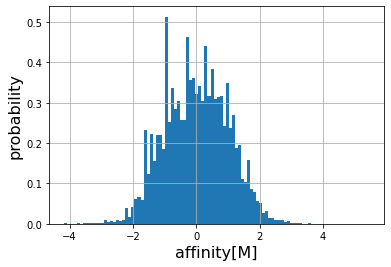

In [28]:
ax = df['affinity'].hist(bins=100,density=True)
ax.set_xlabel('affinity[M]',fontsize=16)
ax.set_ylabel('probability',fontsize=16)
ax.figure.savefig('affinity.pdf')

In [6]:
len(df)

1848949

In [7]:
1.8/0.35

5.142857142857143